# Задание 1

Построить модель предсказания стоимости дома (median_house_value) по остальным его атрибутам

In [1]:
import pandas
datas= pandas.read_csv('housing.csv')


In [20]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(datas, test_size=0.5)
train_v, val= train_test_split(train, test_size=0.2)

<AxesSubplot:>

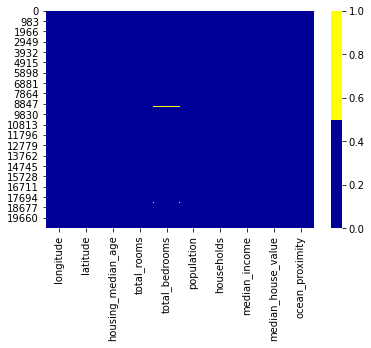

In [21]:
import seaborn as sns
cols = datas.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(datas[cols].isnull(), cmap=sns.color_palette(colours))


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

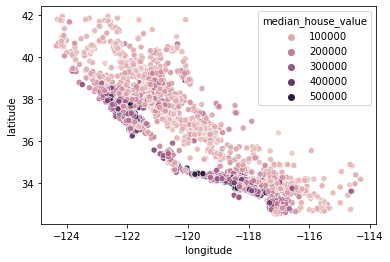

In [22]:
sns.scatterplot(data=train, x='longitude', y='latitude', hue='median_house_value')

<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

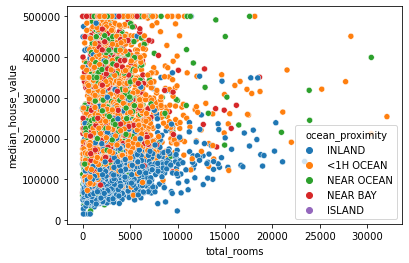

In [23]:
sns.scatterplot(data=train, x='total_rooms', y='median_house_value', hue='ocean_proximity')

<AxesSubplot:xlabel='total_bedrooms', ylabel='median_house_value'>

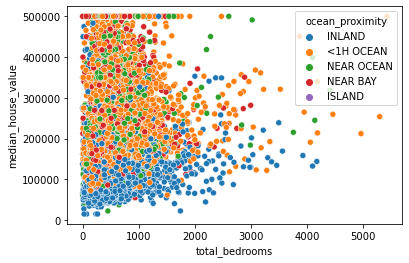

In [24]:
sns.scatterplot(data=train, x='total_bedrooms', y='median_house_value', hue='ocean_proximity')

<AxesSubplot:xlabel='total_rooms', ylabel='total_bedrooms'>

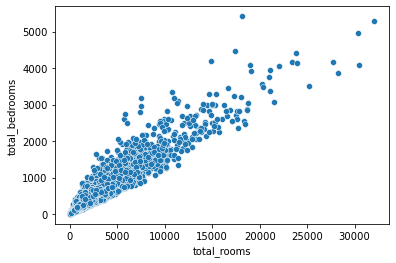

In [25]:
sns.scatterplot(data=train, x='total_rooms', y='total_bedrooms')

<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

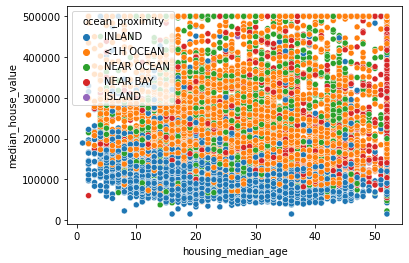

In [26]:
sns.scatterplot(data=train, x='housing_median_age', y='median_house_value', hue='ocean_proximity')

In [27]:
train.isna().sum(axis=0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        102
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [28]:
import numpy as np
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [29]:
def prepare_data(datas):
    datas= datas.copy()
    
    
    imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
    imputer=imputer.fit(datas[['total_bedrooms']]) 
    datas['total_bedrooms'] =imputer.transform(datas[['total_bedrooms']])
    
 

    
    datas=pandas.get_dummies(datas, columns=['ocean_proximity'],prefix=['LOCATED'])
    
    datas=datas[(np.abs(stats.zscore(datas)) < 2).all(axis=1)]
    
    datas['mean_rooms']=datas['total_rooms']/datas['households']
    datas['mean_bedrooms']=datas['total_bedrooms']/datas['households']
    datas=datas.drop(['total_rooms', 'total_bedrooms'], axis = 'columns')
    
    
    
    min_max_scaler = MinMaxScaler()
    datas['longitude'] = min_max_scaler.fit_transform(datas[['longitude']])
    datas['latitude']=min_max_scaler.fit_transform(datas[['latitude']])
    
    
    return [datas.drop(['median_house_value'], axis = 'columns'), datas['median_house_value']]

In [30]:
X_train, y_train=prepare_data(train)

In [31]:
X_train.sample(500)

,longitude,latitude,housing_median_age,population,households,median_income,LOCATED_<1H OCEAN,LOCATED_INLAND,LOCATED_ISLAND,LOCATED_NEAR BAY,LOCATED_NEAR OCEAN,mean_rooms,mean_bedrooms
11876,0.766582,0.193103,15.0,703.0,185.0,3.6415,0,1,0,0,0,7.491892,1.335135
2083,0.456633,0.571034,52.0,1156.0,418.0,1.7298,0,1,0,0,0,4.277512,1.074163
5874,0.642857,0.216552,45.0,720.0,289.0,3.8750,1,0,0,0,0,4.595156,1.003460
12771,0.248724,0.830345,43.0,604.0,218.0,1.6641,0,1,0,0,0,4.628440,1.032110
5962,0.706633,0.208276,34.0,1142.0,332.0,4.3920,0,1,0,0,0,6.102410,1.039157
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8904,0.626276,0.197241,32.0,1310.0,706.0,4.5160,1,0,0,0,0,4.120397,1.059490
1313,0.202806,0.743448,36.0,562.0,213.0,2.5893,0,1,0,0,0,5.356808,1.098592
13974,0.844388,0.231724,14.0,1064.0,376.0,2.8214,0,1,0,0,0,10.529255,2.257979
2833,0.556122,0.383448,30.0,169.0,101.0,1.3527,0,1,0,0,0,2.247525,0.742574


In [32]:
y_train[:5]

3046      65800.0
15415     90800.0
3558     273100.0
6664     215000.0
13296    144300.0
Name: median_house_value, dtype: float64

In [33]:
X_train[X_train.columns].describe()

,longitude,latitude,housing_median_age,population,households,median_income,LOCATED_<1H OCEAN,LOCATED_INLAND,LOCATED_ISLAND,LOCATED_NEAR BAY,LOCATED_NEAR OCEAN,mean_rooms,mean_bedrooms
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.0,6607.0,6607.0,6607.000000,6607.000000
mean,0.532126,0.389246,27.912366,1298.529136,436.521114,3.577635,0.580899,0.419101,0.0,0.0,0.0,5.350524,1.097286
std,0.220768,0.271751,11.644200,696.455361,231.937390,1.417616,0.493449,0.493449,0.0,0.0,0.0,2.049659,0.392716
min,0.000000,0.000000,4.000000,6.000000,2.000000,0.499900,0.000000,0.000000,0.0,0.0,0.0,0.846154,0.429015
25%,0.301020,0.184828,18.000000,793.500000,271.000000,2.503400,0.000000,0.000000,0.0,0.0,0.0,4.443947,1.000000
50%,0.641582,0.215172,28.000000,1177.000000,396.000000,3.375000,1.000000,0.000000,0.0,0.0,0.0,5.204082,1.045714
75%,0.687500,0.652414,36.000000,1691.000000,566.500000,4.512350,1.000000,1.000000,0.0,0.0,0.0,5.949396,1.097357
max,1.000000,1.000000,52.000000,3618.000000,1266.000000,7.711600,1.000000,1.000000,0.0,0.0,0.0,61.812500,11.410714


In [34]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

lreg.fit(X_train, y_train)

LinearRegression()

In [35]:
X_val, y_val=prepare_data(val)

In [36]:
X_val

,longitude,latitude,housing_median_age,population,households,median_income,LOCATED_<1H OCEAN,LOCATED_INLAND,LOCATED_ISLAND,LOCATED_NEAR BAY,LOCATED_NEAR OCEAN,mean_rooms,mean_bedrooms
18101,0.170103,0.652661,24.0,1627.0,585.0,5.1540,1,0,0,0,0,5.791453,1.082051
6250,0.693299,0.194678,34.0,2108.0,498.0,3.4722,1,0,0,0,0,5.114458,1.078313
7637,0.653351,0.163866,21.0,2689.0,913.0,3.4375,1,0,0,0,0,4.800657,0.986857
7210,0.668814,0.193277,43.0,1855.0,502.0,2.2902,1,0,0,0,0,3.258964,1.007968
19324,0.050258,0.823529,48.0,1257.0,571.0,2.1165,1,0,0,0,0,6.898424,1.506130
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16702,0.358247,0.329132,37.0,374.0,95.0,1.4726,1,0,0,0,0,5.505263,1.252632
16224,0.261598,0.746499,36.0,1746.0,544.0,3.4625,0,1,0,0,0,5.722426,1.058824
1937,0.306701,0.841737,9.0,916.0,373.0,3.2250,0,1,0,0,0,5.557641,1.083110
2022,0.461340,0.570028,22.0,530.0,115.0,2.1458,0,1,0,0,0,3.078261,1.052174


In [37]:
lreg_pred=lreg.predict(X_val)

In [38]:
from sklearn.metrics import r2_score
r2_score(y_val, lreg_pred)

0.6140941628621179

In [39]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, scoring='r2',cv=None)
grid.fit(X_train, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='r2')

In [40]:
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [41]:
grid.best_score_

0.6369689606924362